# 4 Flows on the Circle
---

**Overview**

- [4.0 Introduction](#4.0-Introduction)
- [4.1 Examples and Definitions](#4.1-Examples-and-Definitions)
    - [Example 4.1.1](#Example-4.1.1)
    - [Example 4.1.2](#Example-4.1.2)
- [4.2 Uniform Oscillator](#4.2-Uniform-Oscillator)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

## 4.0 Introduction
---

$$\dot{\theta} = f(\theta)$$

**vector field on the circle**


## 4.1 Examples and Definitions
---

### Example 4.1.1

$$\dot{\theta} = \sin\theta$$

*Solution:*



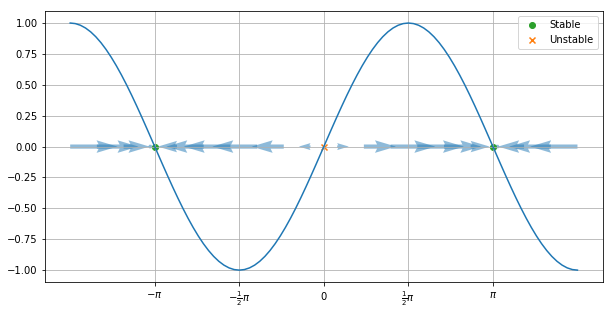

In [13]:
def theta_dot(theta):
    theta_ = np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi*3/2, pi*3/2, 100)
flow = np.linspace(-pi*3/2, pi*3/2, 20)

#ax = plt.subplot(111, projection='polar')
#ax.plot(theta, r)
#ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
#ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line

#ax.quiver(theta, 0, theta_dot(theta), 0)
#ax.grid(True)

plt.figure(figsize=(10, 5))
plt.plot(theta, theta_dot(theta))
plt.quiver(flow, 0, theta_dot(flow), 0, color=c[0], alpha=.5)
plt.scatter(np.array([-pi, pi]), np.array([0, 0]), c=c[2], marker=m[0], label='Stable')
plt.scatter(0, 0, c=c[1], marker=m[1], label='Unstable')

plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
           [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$', ])
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Example 4.1.2

$$\dot{\theta} = \theta$$

*Solution:*



## 4.2 Uniform Oscillator
---

$$\dot{\theta} = \omega$$

$$\theta(t) = \omega t + \theta_0$$

---

**Overview**

- [4.0 Introduction](#4.0-Introduction)
- [4.1 Examples and Definitions](#4.1-Examples-and-Definitions)
    - [Example 4.1.1](#Example-4.1.1)
    - [Example 4.1.2](#Example-4.1.2)
- [4.2 Uniform Oscillator](#4.2-Uniform-Oscillator)